# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
DATA_PATH = './placementdata_raw.csv'

# Memuat data
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Data berhasil dimuat. Jumlah baris: {len(df)}")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di path: {DATA_PATH}")

# Menampilkan 5 baris pertama data
df.head()

Data berhasil dimuat. Jumlah baris: 10000


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
print("--- Bentuk Data ---")
print(f"Jumlah baris (samples): {df.shape[0]}")
print(f"Jumlah kolom (features): {df.shape[1]}")

print("\n--- Informasi Kolom (Tipe Data dan Non-Null Counts) ---")
df.info()

--- Bentuk Data ---
Jumlah baris (samples): 10000
Jumlah kolom (features): 12

--- Informasi Kolom (Tipe Data dan Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus         

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


--- Statistik Deskriptif Fitur Numerik ---

--- Distribusi Fitur Kategorikal (Target) ---
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


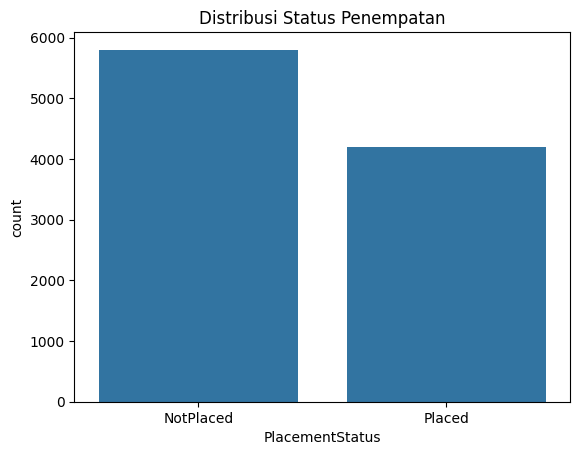

In [ ]:
#Type your code here
print("\n--- Statistik Deskriptif Fitur Numerik ---")
df.describe()

print("\n--- Distribusi Fitur Kategorikal (Target) ---")
# Cek distribusi variabel target
print(df['PlacementStatus'].value_counts())
sns.countplot(x='PlacementStatus', data=df)
plt.title('Distribusi Status Penempatan')
plt.show()

In [ ]:
print("\n--- Pengecekan Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("Tidak ditemukan nilai hilang (missing values) dalam dataset.")


--- Pengecekan Missing Values ---
Series([], dtype: int64)
Tidak ditemukan nilai hilang (missing values) dalam dataset.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Drop kolom StudentID
df_preprocessed = df.drop('StudentID', axis=1)
print("Kolom 'StudentID' berhasil dihapus.")

Kolom 'StudentID' berhasil dihapus.


In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# List kolom biner kategorikal
binary_cols = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

# Lakukan Label Encoding (Yes/Placed = 1, No/NotPlaced = 0)
for col in binary_cols:
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])
    print(f"Kolom '{col}' di-encode. Unique values: {df_preprocessed[col].unique()}")

# Menampilkan 5 baris pertama data setelah preprocessing
print("\n--- Data setelah Preprocessing Awal ---")
df_preprocessed.head()

Kolom 'ExtracurricularActivities' di-encode. Unique values: [0 1]
Kolom 'PlacementTraining' di-encode. Unique values: [0 1]
Kolom 'PlacementStatus' di-encode. Unique values: [0 1]

--- Data setelah Preprocessing Awal ---


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1


In [ ]:
# Tentukan path penyimpanan data hasil preprocessing
OUTPUT_PATH = './placementdata_preprocessing/placement_preprocessed.csv'

# Buat folder jika belum ada
import os
os.makedirs('./placementdata_preprocessing', exist_ok=True)

# Simpan data
df_preprocessed.to_csv(OUTPUT_PATH, index=False)
print(f"\nData hasil preprocessing berhasil disimpan ke: {OUTPUT_PATH}")


Data hasil preprocessing berhasil disimpan ke: ./placementdata_preprocessing/placement_preprocessed.csv
